Exercise 2 task 1

<ipython-input-1-e52f1bd09e70>:12: RuntimeWarning: divide by zero encountered in divide
  return 1 / (1 + abs((x-c)/a)**(2*b))


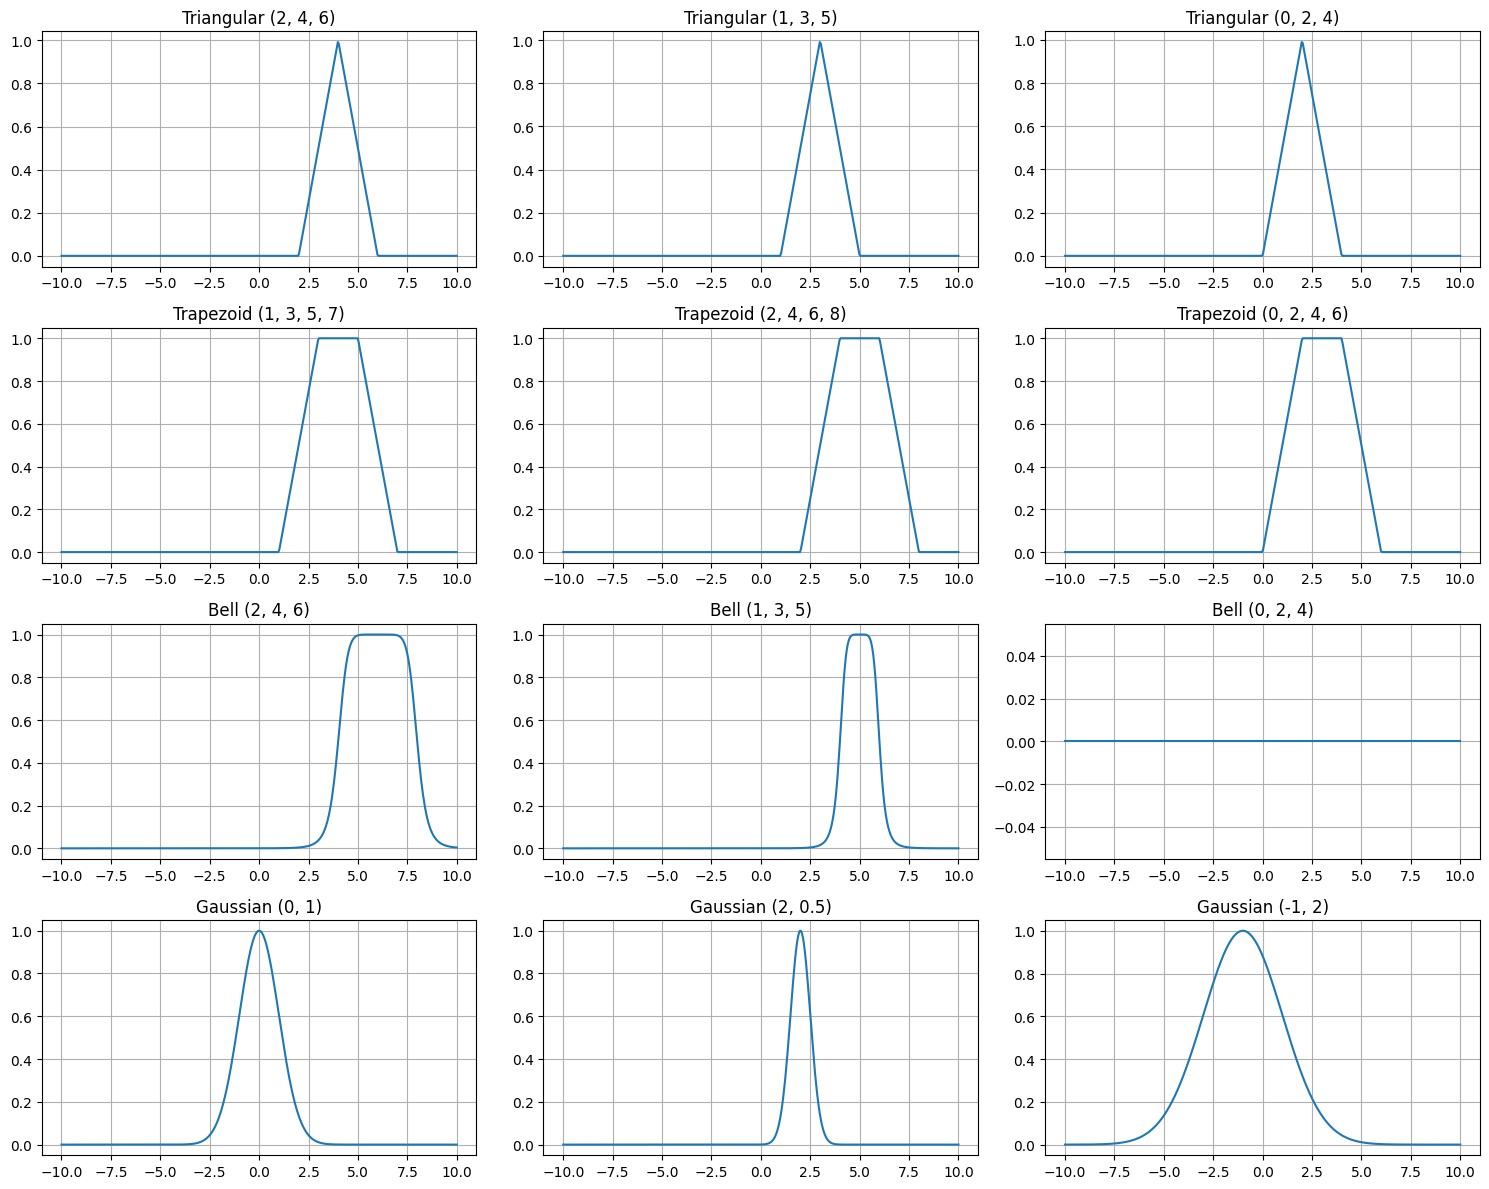

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the fuzzy membership functions
def triangular(x, a, b, c):
    return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)

def trapezoid(x, a, b, c, d):
    return np.maximum(np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)), 0)

def bell(x, a, b, c):
    return 1 / (1 + abs((x-c)/a)**(2*b))

def gaussian(x, c, sigma):
    return np.exp(-0.5 * ((x - c)/sigma)**2)

# Parameters for the functions
params_triangular = [(2, 4, 6), (1, 3, 5), (0, 2, 4)]
params_trapezoid = [(1, 3, 5, 7), (2, 4, 6, 8), (0, 2, 4, 6)]
params_bell = [(2, 4, 6), (1, 3, 5), (0, 2, 4)]
params_gaussian = [(0, 1), (2, 0.5), (-1, 2)]

# Creating an x range
# a linear space from -10 to 10, which will contain 400 points
x_range = np.linspace(-10, 10, 400)

# Plot the fuzzy membership functions
fig, axs = plt.subplots(4, 3, figsize=(15, 12))

for idx, params in enumerate(params_triangular):
    axs[0, idx].plot(x_range, triangular(x_range, *params))
    axs[0, idx].set_title(f"Triangular {params}")
    axs[0, idx].grid(True)

for idx, params in enumerate(params_trapezoid):
    axs[1, idx].plot(x_range, trapezoid(x_range, *params))
    axs[1, idx].set_title(f"Trapezoid {params}")
    axs[1, idx].grid(True)

for idx, params in enumerate(params_bell):
    axs[2, idx].plot(x_range, bell(x_range, *params))
    axs[2, idx].set_title(f"Bell {params}")
    axs[2, idx].grid(True)

for idx, params in enumerate(params_gaussian):
    axs[3, idx].plot(x_range, gaussian(x_range, *params))
    axs[3, idx].set_title(f"Gaussian {params}")
    axs[3, idx].grid(True)

# Set the layout so the plots don't overlap
plt.tight_layout()
plt.show()

Exercise 2 Task 2

In [ ]:
#Calculating the membership values for the corrected x_range using the correct function name
membership_values_corrected = trapezoid(x_range_corrected, a, b, c, d)

#Finding the indices where the membership values are maximum
max_indices_corrected = np.argwhere(membership_values_corrected == np.amax(membership_values_corrected)).flatten()

#Calculating Smallest-of-max using the corrected x range and membership values
Smallest_of_max_corrected = x_range_corrected[max_indices_corrected[0]]

#Calculating Largest-of-max using the corrected x range and membership values
Largest_of_max_corrected = x_range_corrected[max_indices_corrected[-1]]

#Calculating the Center of Area (CoA) using the corrected x range and membership values
#Check for the case where the sum of membership values is zero to avoid division by zero
sum_of_memberships = np.sum(membership_values_corrected)
Z_CoA_corrected = (np.sum(membership_values_corrected * x_range_corrected) / sum_of_memberships
                   if sum_of_memberships != 0 else float('nan'))

#Calculating the Mean of Maximum (MoM) using the corrected x range and membership values
Z_MoM_corrected = np.mean(x_range_corrected[max_indices_corrected])

(Smallest_of_max_corrected, Largest_of_max_corrected, Z_CoA_corrected, Z_MoM_corrected)


(30.02002002002002, 49.95995995995996, 46.00000802405612, 39.98998998998999)

Smalles-of-max: 30.02002002002002

Largest-of-max: 49.95995995995996

Center of Area (CoA): 46,00000802405612

Mean of Maxima (MoM): 39.98998998998999

Exercise 2 task 3

In [ ]:
import numpy as np

# Trapezoidal membership functions for inputs and outputs
def trapezoid(x, a, b, c, d):
    return np.maximum(0, np.minimum(np.minimum((x - a) / (b - a), 1), (d - x) / (d - c)))

# Degree of membership for a given x for all membership functions
def calculate_memberships(x, functions):
    return [f(x) for f in functions]

# Perform the fuzzy inference
def fuzzy_inference(x, input_functions, output_ranges):
    # Calculate memberships for all input functions
    memberships = calculate_memberships(x, input_functions)

    # Apply rules - since the rules are 'if X is Ai then Y is Bi' we apply the input membership to the output
    output_memberships = [np.fmin(membership, output_range) for membership, output_range in zip(memberships, output_ranges)]

    # Aggregate all outputs - for Mamdani we use the maximum
    aggregated = np.fmax(output_memberships[0], np.fmax(output_memberships[1], output_memberships[2]))

    return aggregated

# Centroid defuzzification
def centroid(y_values, aggregated):
    numerator = np.sum(y_values * aggregated)
    denominator = np.sum(aggregated)
    return numerator / denominator if denominator != 0 else 0

# Define the input and output ranges
x_range = np.arange(-10, 11, 1)
y_range = np.arange(-10, 21, 1)

# Membership functions for inputs and outputs told in assignment
input_functions = [
    lambda x: trapezoid(x, -20, -15, -6, -3),
    lambda x: trapezoid(x, -6, -3, 3, 6),
    lambda x: trapezoid(x, 3, 6, 15, 20)
]

output_ranges = [
    trapezoid(y_range, -2, -1.46, 1.46, 2.46),
    trapezoid(y_range, 1, 4.26, 4.26, 5.7),
    trapezoid(y_range, 5.7, 13, 13, 15)
]


# Inputs for which we need to calculate the defuzzified outputs
inputs = [-8, -5, 0, 5, 8]

# Calculate the defuzzified output for each input
defuzzified_outputs = [centroid(y_range, fuzzy_inference(x, input_functions, output_ranges)) for x in inputs]

defuzzified_outputs



[0.2658959537572254,
 1.4219653179190752,
 3.681560153817982,
 9.213166462372055,
 11.215859030837004]